In [9]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

display(HTML('<script> $(document).ready(function() { $("div.input").hide(); }); </script>'))

## Transfer functions

In the following example, we will take a look at the formulation of transfer functions. While used in various fields, in control theory transfer functions describe the frequency transfer characteristics of a Linear Time-invariant (LTI) system.

Generally, a transfer function describes the relationship between the Laplace transform of the input $u(t)$ and output $y(t)$ signals:

$$U(s)=\mathcal{L}\{u(t)\} \quad Y(s)=\mathcal{L}\{y(t)\}$$

$$Y(s)=G(s)U(s)$$

<img src="Images/tf.png" width="30%" />

In the case of LTI systems, the transfer function can be described as a fraction of two polynomials:

$$G(s)=\frac{\sum\limits_{j=0}^{m}b_js^j}{\sum\limits_{i=0}^{n}a_is^i},$$

where the denominator $a(s)$ is the characteristic polynomial of the system.
<br>Normalizing the components to $a^n=1$, the resulting forms are:

$$a(s) = s^n + a_{n-1}s^{n-1} + a_{n-2}s^{n-2} + ... + a_1s^1 + a_0$$
$$b(s) = b_ms^m + b_{m-1}s^{m-1} + b_{m-2}s^{m-2} + ... + b_1s^1 + b_0$$

For physical systems, the degree of the numerator is less than the degree of the denominator; this type is called a strictly proper transfer function. In this case, the frequency transfer converges to zero at infinity.


<br><b>Assemble a transfer function by selecting the polynomial terms!</b>

In [10]:
b = {}
a = {}

b[0] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[2] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[3] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[4] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))

a[0] = w.FloatText(value=10.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[2] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[3] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[4] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[5] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))

def transfer_function(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):

    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    global b
    
    if a5 == 0:
        b[4].disabled=True
        b4c = 0
    else:
        b[4].disabled=False
        
    if a5 == 0 and a4==0:
        b[3].disabled=True
        b3c = 0
    else:
        b[3].disabled=False    
        
    if a5 == 0 and a4 == 0 and a3 == 0:
        b[2].disabled=True
        b2c = 0
    else:
        b[2].disabled=False    
        
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b[1].disabled=True
        b1c = 0
    else:
        b[1].disabled=False   
    
    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function

    print('The resulting transfer function:')
    print(G)

input_data = w.interactive_output(transfer_function, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                                                      'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})

display(w.HBox([w.VBox([w.Label('$G(s)=$')], layout=w.Layout(justify_content="center", align_items='flex-start')),
        w.VBox([w.HBox([b[4], w.Label('$s^4+$'), b[3], w.Label('$s^3+$'), b[2], w.Label('$s^2+$'),
                    b[1], w.Label('$s+$'), b[0]], layout=w.Layout(justify_content='center')),
                    w.HBox([w.HTML(value='<hr style="border-top: 1px solid black">', layout=w.Layout(width='100%'))],
                           layout=w.Layout(justify_content='center')),
                    w.HBox([a[5], w.Label('$s^5+$'), a[4], w.Label('$s^4+$'), a[3], w.Label('$s^3+$'), a[2], w.Label('$s^2+$'),
                    a[1], w.Label('$s+$'), a[0]], layout=w.Layout(justify_content='center')) ],
               layout=w.Layout(width='70%'))], layout=w.Layout(justify_content='center') ), input_data)

Output()

The solutions of the numerator and denominator polynomials are called the system's zeros and poles, respectively. They can be used to determine system's stability and evaluate its performance.

Both zeros and poles are either real numbers or complex conjugate pairs (if the system's differential equations are real-valued).

<br><b>Experiment with the polynomial terms and observe the changes in the pole-zero map!</b>

<IPython.core.display.Javascript object>


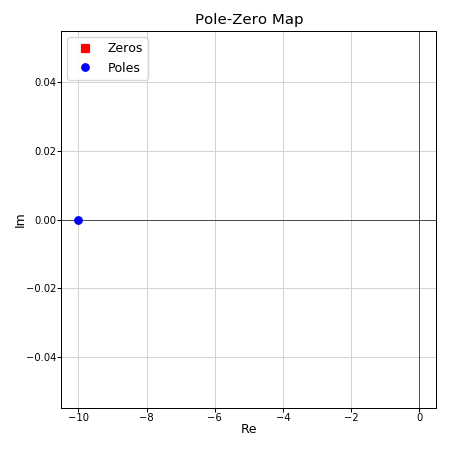

Output()

In [11]:
fig1, (f1_ax1) = plt.subplots(1, 1)
fig1.set_size_inches((5, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [], 'rs')
f1_line2, = f1_ax1.plot([], [], 'bo') 

f1_ax1.axhline(y=0, color='k', lw=0.5)
f1_ax1.axvline(x=0, color='k', lw=0.5)

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax1.autoscale(enable=True, axis='both')

f1_ax1.set_title('Pole-Zero Map', fontsize=12)
f1_ax1.set_xlabel('Re', labelpad=0, fontsize=10)
f1_ax1.set_ylabel('Im', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax1.legend([f1_line1, f1_line2], ['Zeros', 'Poles'])

def pz_map(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):
    
    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    if a5 == 0:
        b4c = 0
        
    if a5 == 0 and a4==0:
        b3c = 0
    
    if a5 == 0 and a4 == 0 and a3 == 0:
        b2c = 0
   
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b1c = 0

    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function
    
    p = c.pole(G)  # Poles
    z = c.zero(G)  # Zeros
    
    px = [x.real for x in p] 
    py = [x.imag for x in p]
    
    zx = [x.real for x in z]
    zy = [x.imag for x in z]
    
    global f1_line1, f1_line2
    
    try:
        f1_ax1.lines.remove(f1_line1)
        f1_ax1.lines.remove(f1_line2)
    except:
        pass
    
    f1_line1, = f1_ax1.plot(zx, zy, 'rs') 
    f1_line2, = f1_ax1.plot(px, py, 'bo')
    
    f1_ax1.relim()
    f1_ax1.autoscale_view()
    
    
    
w.interactive_output(pz_map, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                              'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})

The time-domain counterpart of the transfer function is the impulse response: $g(t)$. As the Laplace transform of the Dirac delta function is the constant 1, the transfer function of an LTI system can be matched with its impulse response.

$$\mathcal{L}\{\delta(t)\} = 1$$

$$1\cdot G(s) \; \xrightarrow{\mathcal{L}^{-1}} \; \delta(t)*g(t)$$

$$Y(s) = G(s)U(s) \; \xrightarrow{\mathcal{L}^{-1}} \; y(t) = \int\limits_{-\infty}^{\infty}g(t-\tau)u(\tau) d\tau,$$

where, according to Laplace transformation rules, multiplication in the frequency domain is matched with convolution in the time domain, and convolving a function with the Dirac delta returns the same function.

<br><b>Observe the changes in the impulse response between various configurations!</b>

<IPython.core.display.Javascript object>


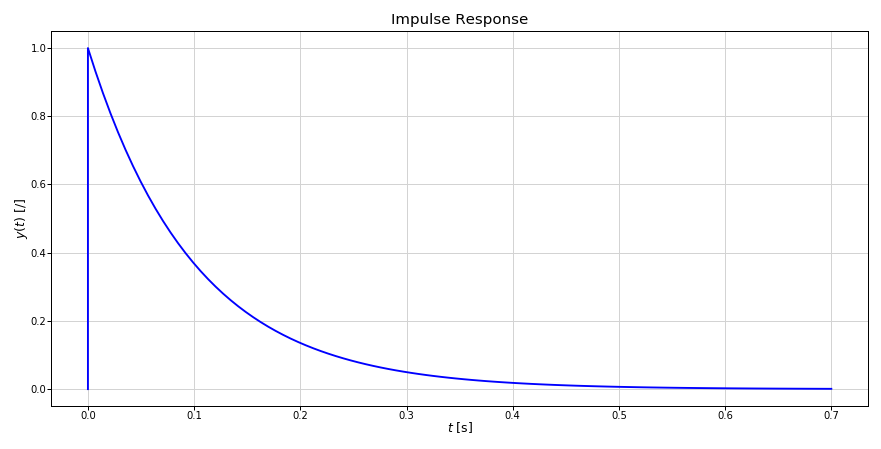

Output()

In [12]:
fig2, (f2_ax1) = plt.subplots(1, 1)
fig2.set_size_inches((9.8, 5))
fig2.set_tight_layout(True)

f2_line1, = f2_ax1.plot([], [])

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax1.autoscale(enable=True, axis='both')

f2_ax1.set_title('Impulse Response', fontsize=12)
f2_ax1.set_xlabel(r'$t$ [s]', labelpad=0, fontsize=10)
f2_ax1.set_ylabel(r'$y(t)$ [/]', labelpad=0, fontsize=10)
f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

def inp_resp(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):
    
    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    if a5 == 0:
        b4c = 0
        
    if a5 == 0 and a4==0:
        b3c = 0
    
    if a5 == 0 and a4 == 0 and a3 == 0:
        b2c = 0
   
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b1c = 0

    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function
    
    tout, yout = c.impulse_response(G)
    
    global f2_line1
    
    try:
        f2_ax1.lines.remove(f2_line1)
    except:
        pass

    f2_line1, = f2_ax1.plot(np.concatenate(([0], tout)), np.concatenate(([0], yout)), '-b') 
    
    f2_ax1.relim()
    f2_ax1.autoscale_view()
    
    
w.interactive_output(inp_resp, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                              'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})